# **Prepare datasets**

Kami memakai dataset dari link ini https://drive.google.com/file/d/1RCHGfn9JJyyReAh8PIIoF8Ch0H3miP0u/view. Di dalamnya terdapat file train_preporcess.tsv.txt yang kami simpan di folder contentplatinum

Setelah kami download, file tersebut kami import dengan pandas kedalam notebook ini untuk diolah.

In [1]:
import pandas as pd


df = pd.read_table('contentplatinum/train_preprocess.tsv.txt', header=None)
df.columns = ['text', 'label']

In [2]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [3]:
df.shape

(11000, 2)

In [4]:
df.label.value_counts()

positive    6416
negative    3436
neutral     1148
Name: label, dtype: int64

Kita cek isi datasetnya dan di dalamnya terdapat 12000 label data. Terdiri dari:


*   Positive: 6416
*   Neutral: 1148
*   Negative: 3436


# **Text Normalization/Cleansing**

Lalu kita lakukan cleansing sebagai berikut

In [5]:
import re 

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

In [6]:
df['text_clean'] = df.text.apply(cleansing)

In [7]:
df.head()

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...


In [37]:
#backup untuk sql
import sqlite3

conn = sqlite3.connect('dataset.sql')
df.to_sql('dataset', conn)
conn.close()

# **Feature Extraction: Bag of Words**

Setelah itu kita lakukan Feature Extraction menggunakan metode Bag of Words

In [34]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df.text_clean.tolist()

In [35]:
data_preprocessed

['warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung   tahu berkualitas   dipadu keahlian memasak   dipadu kretivitas   jadilah warung yang menyajikan menu utama berbahan tahu   ditambah menu umum lain seperti ayam   semuanya selera indonesia   harga cukup terjangkau   jangan lewatkan tahu bletoka nya   tidak kalah dengan yang asli dari tegal  ',
 'mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah pecah',
 'lokasi strategis di jalan sumatera bandung   tempat nya nyaman terutama sofa di lantai 2   paella nya enak   sangat pas dimakan dengan minum bir dingin   appetiser nya juga enak enak  ',
 'betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus   menetapkan beli lagi  ',
 'duh   jadi mahasiswa jangan sombong dong   kasih kartu kuning segala   belajar dulu yang baik   tidak usahlah ikut ikut politik   nanti sudah selesai kuliah nya mau ikut politik juga tidak telat 

In [10]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [11]:
import pickle

pickle.dump(count_vect, open("featureplatinumneuralnetwork.p", "wb"))

# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 80% untuk train dan 20% untuk test.

In [12]:
from sklearn.model_selection import train_test_split

classes = df.label

In [13]:
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: label, Length: 11000, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# Training (Neural Network)

Jalankan training dengan metode Neural Network. "MLPClassifier" merupakan salah satu modul dari "Neural Network" pada library Sklearn.

In [15]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='logistic')
model.fit(X_train, y_train)

print ("Training selesai")

Training selesai


In [16]:
pickle.dump(model, open("modelplatinumneuralnetwork.p", "wb"))

# **Evaluation**

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [17]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

Testing selesai
              precision    recall  f1-score   support

    negative       0.74      0.72      0.73       707
     neutral       0.83      0.63      0.72       230
    positive       0.84      0.89      0.86      1263

    accuracy                           0.81      2200
   macro avg       0.80      0.75      0.77      2200
weighted avg       0.81      0.81      0.80      2200



Hasilnya nilai F1 Score ada pada angka 0.73 untuk Negative, 0.72 untuk Neutral, dan 0.86 untuk Positive. Hasil ini bisa dikatakan cukup bagus untuk sebuah model.

## **Cross Validation**

Mekanisme evaluasi selanjutnya menggunakan "Cross Validation", yaitu merotasi porsi testing dari dataset agar bisa melihat model yang sudah kita buat stabil ketika dihadapkan pada data yang berbeda.

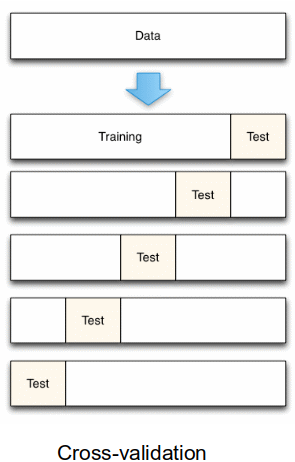

In [18]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    # clf = MLPClassifier()
    clf = MLPClassifier(activation='logistic')
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.71      0.76      0.74       680
     neutral       0.75      0.63      0.68       239
    positive       0.86      0.86      0.86      1281

    accuracy                           0.80      2200
   macro avg       0.78      0.75      0.76      2200
weighted avg       0.80      0.80      0.80      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.73      0.70      0.72       706
     neutral       0.71      0.66      0.69       220
    positive       0.84      0.87      0.86      1274

    accuracy                           0.80      2200
   macro avg       0.76      0.75      0.75      2200
weighted avg       0.79      0.80      0.80      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.73      0.74      0.73       682
     neutral       0.82      0.68      0.74       215
    positive       0.86      0

Hasilnya nilai rata-rata accuracy pada angka 0.805. Ini menunjukkan model kita cukup stabil pada angka 0.805.

# Predict

Asumsi kita sudah oke dengan model yang dibikin, selanjutnya melakukan predict pada model untuk mengetes jika model sudah jalan.

In [19]:
original_text =  '''
Rasa syukur dan bahagia , cukup.
'''
# original_text =  '''
# Pelayanan buruk, tempat parkir sempit, makanan ga enak, nyesel datang
# '''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

positive


In [20]:
print(model.predict(text))

['positive']


In [21]:

import pickle

nn_model = pickle.load(open("modelplatinumneuralnetwork.p", "rb"))

In [22]:
print(nn_model.predict(text))

['positive']
